In [184]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [185]:
# Define the paths to your image and csv folders
train_val= "./charts/train_val"
test = "./charts/test"
train_path_csv = "./charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_csv)

In [186]:
# load training dataset in numpy array
def loadimages(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            # Load the images and resize them to (128, 128) with 3 color channels
            img = cv2.imread(os.path.join(train_val, filename))
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # img = Image.open(os.path.join(train_val, filename))
            img_array = np.array(img)
            # Append the array to the list of images
            images.append(img_array)
            labels.append(filename)
    # Convert the string labels to numerical labels
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images,labels
x_train,y_train = loadimages(train_val)
x_test,y_test = loadimages(test)

In [187]:
x_train.shape

(1000, 128, 128, 3)

In [188]:
x_test.shape

(50, 128, 128, 3)

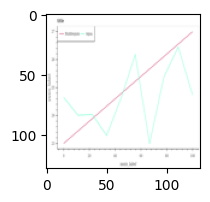

In [189]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [190]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [191]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

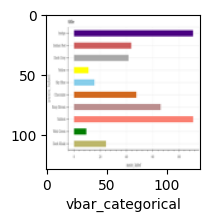

In [192]:
image_sample(x_train,y_train,164)

In [193]:
# now we have mapped the corresponding labels to the image

In [194]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [195]:
x_test.shape

(1000, 128, 128, 3)

In [196]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [197]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
    ])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 9s 279ms/step - loss: 12.5365 - accuracy: 0.1985
Epoch 2/10
32/32 [==============================] - 9s 277ms/step - loss: 1.6376 - accuracy: 0.2207
Epoch 3/10
32/32 [==============================] - 9s 278ms/step - loss: 1.5943 - accuracy: 0.2633
Epoch 4/10
32/32 [==============================] - 9s 275ms/step - loss: 1.6228 - accuracy: 0.2476
Epoch 5/10
32/32 [==============================] - 9s 272ms/step - loss: 1.6066 - accuracy: 0.2375
Epoch 6/10
32/32 [==============================] - 9s 275ms/step - loss: 1.5710 - accuracy: 0.2880
Epoch 7/10
32/32 [==============================] - 9s 269ms/step - loss: 1.5673 - accuracy: 0.2709
Epoch 8/10
32/32 [==============================] - 9s 274ms/step - loss: 1.6069 - accuracy: 0.2070
Epoch 9/10
32/32 [==============================] - 9s 275ms/step - loss: 1.6110 - accuracy: 0.1951
Epoch 10/10
32/32 [==============================] - 9s 275ms/step - loss: 1.5968 - accuracy: 0.258

In [198]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [199]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 57ms/step - loss: 1.6272 - accuracy: 0.1900


[1.627205491065979, 0.1899999976158142]

In [200]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

In [201]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [202]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.6179 - accuracy: 0.2025 - val_loss: 2.3889 - val_accuracy: 0.2400
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 2.3449 - accuracy: 0.1900 - val_loss: 2.3062 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 2.1267 - accuracy: 0.2087 - val_loss: 1.6453 - val_accuracy: 0.2800
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.6408 - accuracy: 0.2688 - val_loss: 1.6115 - val_accuracy: 0.2200
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.6293 - accuracy: 0.1975 - val_loss: 1.5732 - val_accuracy: 0.3000
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.5765 - accuracy: 0.2862 - val_loss: 1.5974 - val_accuracy: 0.2900
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.5647 - accuracy: 0.3375 - val_loss: 1.5898 - val_accuracy: 0.2450
Epoch 8/50
1/1 [=========================

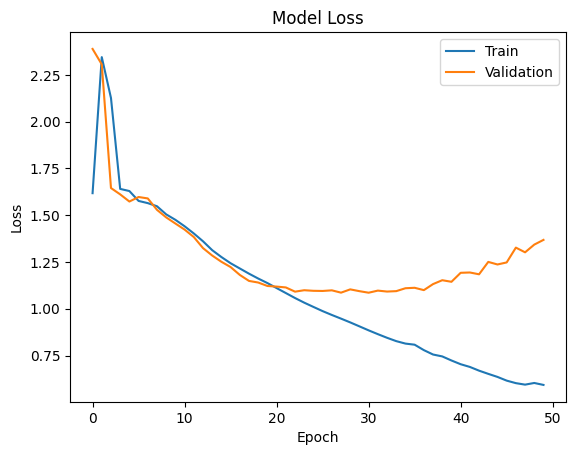

In [203]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [204]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 23ms/step - loss: 1.3682 - accuracy: 0.5500


[1.3682152032852173, 0.550000011920929]

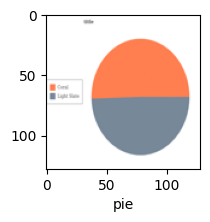

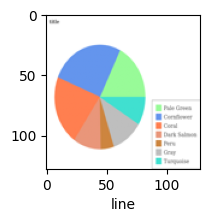

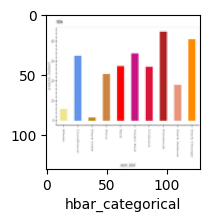

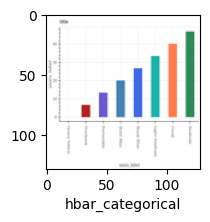

In [205]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [206]:
# Observation: we can see some wrong predictions

In [207]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

array([[6.44743145e-01, 1.53863564e-01, 1.45292625e-01, 9.02006403e-03,
        4.70806062e-02],
       [5.69993913e-01, 1.44088306e-02, 1.86308147e-03, 8.35753884e-03,
        4.05376703e-01],
       [2.23288104e-01, 8.25921481e-04, 1.46966497e-03, 7.73286331e-04,
        7.73643017e-01],
       [9.26456213e-01, 4.95815357e-07, 2.40684138e-03, 2.17892835e-03,
        6.89574555e-02],
       [6.99473262e-01, 1.13355204e-01, 1.58977255e-01, 4.13993979e-03,
        2.40543373e-02]], dtype=float32)

In [208]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 4, 0, 0]

In [209]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

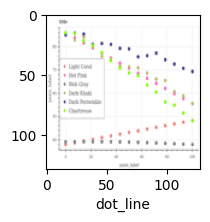

In [222]:
# here we see some values are not matching

'dot_line'

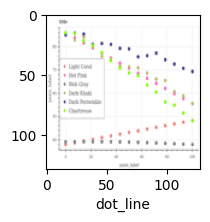

In [211]:
# test actual and predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [212]:
# some values are not matching

In [213]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.38      0.62      0.47        37
           1       0.87      0.59      0.70        44
           2       0.63      0.35      0.45        48
           3       0.43      0.61      0.51        33
           4       0.65      0.63      0.64        38

    accuracy                           0.55       200
   macro avg       0.59      0.56      0.56       200
weighted avg       0.61      0.55      0.56       200



In [214]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[23  2  2  2  8]
 [14 26  0  2  2]
 [12  0 17 19  0]
 [ 1  2  7 20  3]
 [10  0  1  3 24]]


Text(95.72222222222221, 0.5, 'Actual')

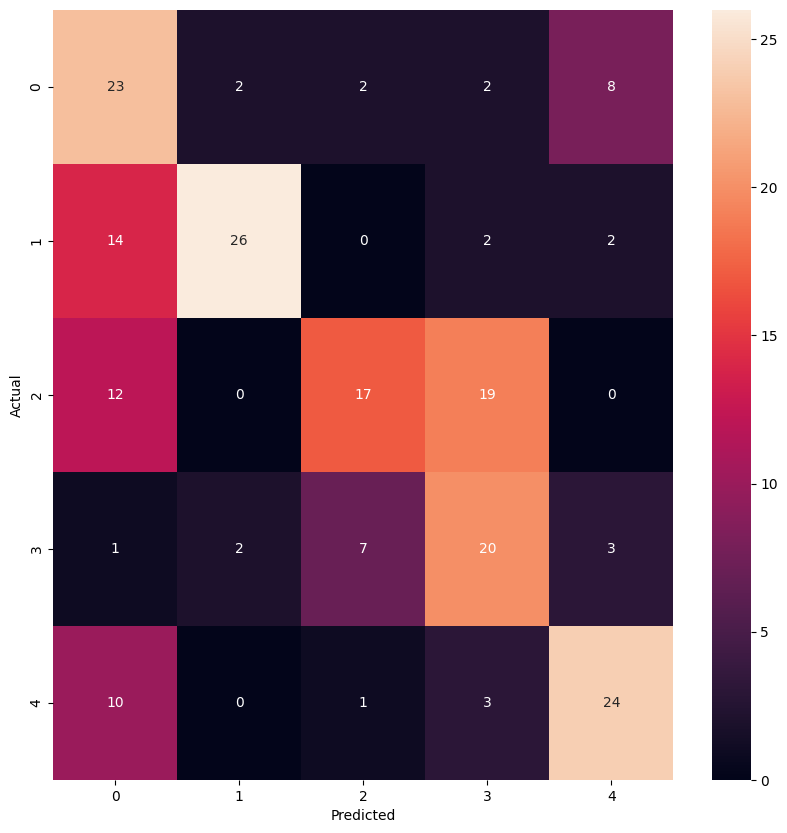

In [215]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [216]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [217]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [218]:
# Replace the final classification layer with a new layer
pt_model = tf.keras.models.Sequential([
    vgg16_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [219]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
        layer.trainable = False

In [220]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [221]:
# Print the summary of the model architecture
pt_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 14,780,997
Trainable params: 0
Non-trainable params: 14,780,997
_________________________________________________________________
